In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# take in 3 values: a, b, c

a = 0.0001
b = 1000
c = 0.001

def quad(a, b, c):
    
    num1 = (-b) + np.sqrt((b**2)-(4*a*c))
    num2 = (-b) - np.sqrt((b**2)-(4*a*c))
    den1 = 2*a
    den2 = 2*c
    sol1 = num1/den1
    sol2 = num2/den1
    sol3 = den2/num1
    sol4 = den2/num2
    
    return sol1, sol2, sol3, sol4

print(quad(a, b, c))

#The roots I got were differernt depending on which equation I used. This is likely due to differences in rounding.

(-9.99875737761613e-07, -9999999.999999, -10001242.7768141, -1.0000000000001001e-06)


In [3]:
def f(x):
    f = (x**4 - 2*x + 1)
    return f

def simpsons(a, b, n):
    
    h = (b - a)/n
    oddsum = 0
    evensum = 0
    
    for k in range(n//2):
        oddsum = oddsum + f(a + ((2*k - 1)*h))
        
    for k in range(n//2-1):
        evensum = evensum + f(a + (2*k*h))
        
    sol = h*(1/3)*((f(a)) + (f(b)) + (4*oddsum) + (2*evensum))    
    
    return sol

print(simpsons(0, 2, 10))
print(simpsons(0, 2, 100))
print(simpsons(0, 2, 1000))

2.2210133333333335
3.952307208533333
4.352329899523926


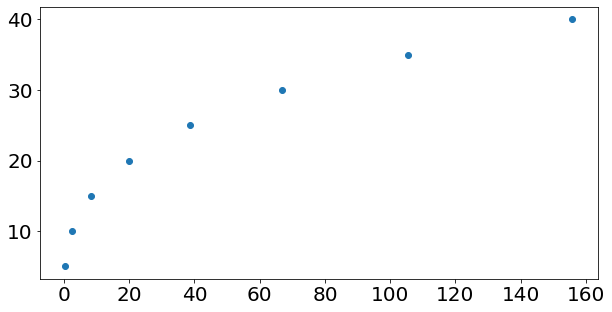

In [4]:
V = 0.001  #volume in cubic meters
p = 6.022*(10**28)  #density in m^-3
K = 1.38*(10**(-23))  #boltzmanns constant
D = 428  #Debye temp
N = 1000  #number of slices

def f(x):
    
    num = (x**4) * (2.7182818**x)
    den = ((2.7182818**x)-1)**2
    return num/den

def cv(T):
    a = 0
    b = (D/T)
    h = (b-a)/N
    s = 0.5*f(b)
    
    for k in range(1, N):
        s += f(a+k*h) 
    
    Cv = 9*V*p*K*((T/D)**3)*(h*s)
    
    return Cv

data = []
Temp = []
for T in range(5,45,5):
    data.append(cv(T))
    Temp.append(T)

fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111)
ax1.scatter(data,Temp)

ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)